In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

from tensorflow.keras import Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, LeakyReLU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = h5py.File(r'/content/drive/MyDrive/Data/Single Factor Generated Data/MA0035_4_m3_train.h5', 'r')
test_data = h5py.File(r'/content/drive/MyDrive/Data/Single Factor Generated Data/MA0035_4_m3_test.h5', 'r')  

train_data_binlabels, train_data_features = np.array(train_data['binlabels']), np.array(train_data['data'])
test_data_binlabels, test_data_features = np.array(test_data['binlabels']), np.array(test_data['data'])

train_data_features = np.array([i.T for i in train_data_features])
test_data_features = np.array([i.T for i in test_data_features])

train_data.close()
test_data.close()

In [ ]:
def plot_loss_and_AUC(model_history):
  fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

  ax[0].plot(model_history.history["loss"])
  ax[0].plot(model_history.history["val_loss"])
  ax[0].title.set_text('model train loss vs validation loss')
  ax[0].set(xlabel="loss", ylabel="epoch")
  ax[0].legend(['train', 'validation'], loc='upper right')

  ax[1].plot(model_history.history["AUC"])
  ax[1].plot(model_history.history["val_AUC"])
  ax[1].title.set_text('model train accuracy vs validation accuracy')
  ax[1].set(xlabel="accuracy", ylabel="epoch")
  ax[1].legend(['train', 'validation'], loc='lower right')

  plt.show()

In [ ]:
clear_session()

input_layer = Input(shape = (1000, 4))

hidden_layer = Conv1D(filters = 16, kernel_size = 10, padding = "same", activation = LeakyReLU(alpha=0))(input_layer)
hidden_layer = MaxPooling1D(pool_size = 4, strides = 4)(hidden_layer)
hidden_layer = Dropout(0.1)(hidden_layer)
hidden_layer = Conv1D(filters = 24, kernel_size = 10, padding = "same", activation = LeakyReLU(alpha=0))(hidden_layer)
hidden_layer = MaxPooling1D(pool_size = 4, strides = 4)(hidden_layer)
hidden_layer = Dropout(0.1)(hidden_layer)
hidden_layer = Conv1D(filters = 32, kernel_size = 8, padding = "same", activation = LeakyReLU(alpha=0))(hidden_layer)
hidden_layer = MaxPooling1D(pool_size = 4, strides = 4)(hidden_layer)
hidden_layer = Dropout(0.1)(hidden_layer)
hidden_layer = Flatten()(hidden_layer)
hidden_layer = Dense(units = 32, activation = LeakyReLU())(hidden_layer)
hidden_layer = Dropout(0.1)(hidden_layer)

output = Dense(1, activation = "sigmoid")(hidden_layer)

single_class_model = Model(inputs = input_layer, outputs=output)
 
single_class_model.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(beta_1 = 0.95),
    metrics = [AUC(name = "AUC")]
)

single_class_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 4)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1000, 16)          656       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 16)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 250, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 250, 24)           3864      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 62, 24)           0         
 1D)                                                         

In [ ]:
single_class_model_history = single_class_model.fit(train_data_features, train_data_binlabels, epochs = 30, batch_size = 1000, validation_split = 5e-2, shuffle = True)  

Epoch 1/30
95/95 [==============================] - 8s 69ms/step - loss: 0.6938 - AUC: 0.4989 - val_loss: 0.6925 - val_AUC: 0.4963
Epoch 2/30
95/95 [==============================] - 6s 64ms/step - loss: 0.6925 - AUC: 0.5020 - val_loss: 0.6927 - val_AUC: 0.4919
Epoch 3/30
95/95 [==============================] - 6s 65ms/step - loss: 0.6925 - AUC: 0.5046 - val_loss: 0.6925 - val_AUC: 0.4946
Epoch 4/30
95/95 [==============================] - 6s 64ms/step - loss: 0.6924 - AUC: 0.5075 - val_loss: 0.6925 - val_AUC: 0.4918
Epoch 5/30
95/95 [==============================] - 6s 64ms/step - loss: 0.6924 - AUC: 0.5067 - val_loss: 0.6925 - val_AUC: 0.4934
Epoch 6/30
95/95 [==============================] - 6s 64ms/step - loss: 0.6922 - AUC: 0.5115 - val_loss: 0.6926 - val_AUC: 0.5003
Epoch 7/30
95/95 [==============================] - 6s 64ms/step - loss: 0.6918 - AUC: 0.5208 - val_loss: 0.6921 - val_AUC: 0.5147
Epoch 8/30
95/95 [==============================] - 6s 64ms/step - loss: 0.6915 - A

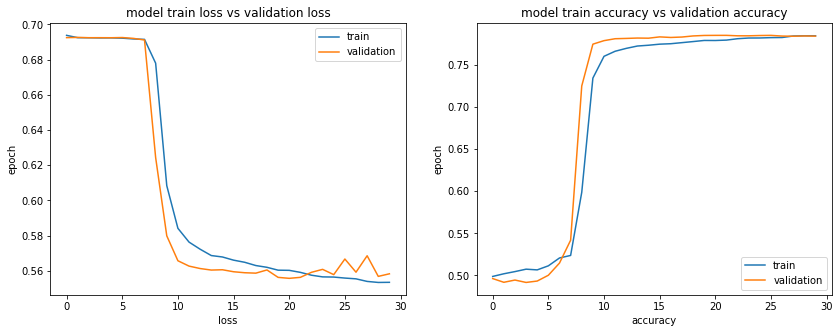



313/313 [==============================] - 2s 5ms/step - loss: 0.5428 - AUC: 0.8037


[0.5427682399749756, 0.8036550879478455]

In [ ]:
plot_loss_and_AUC(single_class_model_history)
print("\n")
single_class_model.evaluate(test_data_features, test_data_binlabels)

In [ ]:
single_class_model.save('/content/drive/MyDrive/Data/convnet_binary_classification.h5')